In [65]:
#Load libraries
import pandas as pd
import nltk
import matplotlib
import numpy

In [66]:
df = pd.read_csv("small_df.csv",delimiter=',')

Import MWE Tokenizer

In [67]:
import nltk
from nltk.tokenize import MWETokenizer
mw_tokenizer = nltk.tokenize.MWETokenizer()

In [68]:
#remove score 
#df.drop(index=df.index[0], axis=0, inplace=True)
df.drop(index=[0], inplace=True)


In [69]:
#loop through csv to extract words
##turn the csv into a dictionary
all_doc = df.to_dict(orient='list')

def get_key(val):
    for key, value in all_doc.items():
        if val == value:
            return key
   
##key is header and value is an array of the type (string,POStag) after lemmazation
for val in all_doc.values():
    key = get_key(val)
    val = ' '.join(val)
    val = val.split(" ")
    res = []   #remove "\n"
    for token in val:
        res.append(token.replace('\\n', " "))
    val = ' '.join(res)
    #val = val.split(" ") do tokenization when lemmazation below
    all_doc[key] = val
#split text base on space

In [70]:
#multiword tokenization
from nltk import ngrams
nltk.download('punkt')
n = 2
ngrams_list = []
for val in all_doc.values():
    key = get_key(val)
    ngrams_list += ngrams(nltk.word_tokenize(val), n)
bigrams_list =[gram for gram in ngrams_list]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [71]:
fdist = nltk.FreqDist(bigrams_list)
for term,value in fdist.items():
    if value>5 and term[0].isalpha() and term[1].isalpha():
        print(term,value)

('need', 'to') 6
('is', 'good') 12
('price', 'is') 10
('service', 'is') 7
('is', 'also') 7
('can', 'be') 7
('a', 'bit') 16
('with', 'the') 8
('and', 'the') 28
('a', 'little') 10
('at', 'the') 10
('front', 'of') 6
('of', 'the') 25
('the', 'store') 6
('wait', 'for') 6
('there', 'are') 7
('on', 'the') 13
('but', 'it') 8
('there', 'is') 10
('is', 'a') 17
('have', 'a') 12
('soup', 'is') 6
('food', 'and') 11
('to', 'the') 12
('like', 'the') 7
('for', 'the') 13
('the', 'price') 8
('and', 'service') 6
('but', 'the') 11
('I', 'would') 6
('which', 'is') 13
('is', 'very') 20
('very', 'good') 12
('you', 'can') 13
('I', 'think') 7
('is', 'the') 6
('You', 'can') 11
('for', 'a') 13
('and', 'it') 14
('if', 'you') 11
('I', 'ordered') 8
('is', 'not') 17
('I', 'have') 6
('you', 'do') 7
('this', 'place') 7
('a', 'small') 7
('and', 'a') 8
('nice', 'and') 7
('in', 'the') 14
('the', 'taste') 9
('with', 'a') 8
('the', 'sauce') 6
('taste', 'is') 7
('is', 'no') 7
('very', 'nice') 7
('The', 'food') 6
('food', 'i

In [72]:
#!pip3 install spacy

import spacy

In [73]:
#lemmatization
nlp = spacy.load("en_core_web_sm")
for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [(token.lemma_,token.pos_) for token in nlp(val)]

In [74]:
#remove stop-words
!pip3 install stop-words
from stop_words import get_stop_words
stopwords = get_stop_words('english')

for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [word for word in val if not word[0] in stopwords]


In [75]:
#visulization of the frequence of tokens
poll_doc = []
for val in all_doc.values():
    poll_doc+= [word[0] for word in val]

from nltk import FreqDist
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4)) 
parameters = {'axes.labelsize': 15,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)

fdist2 = FreqDist(poll_doc)

<Figure size 400x400 with 0 Axes>

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


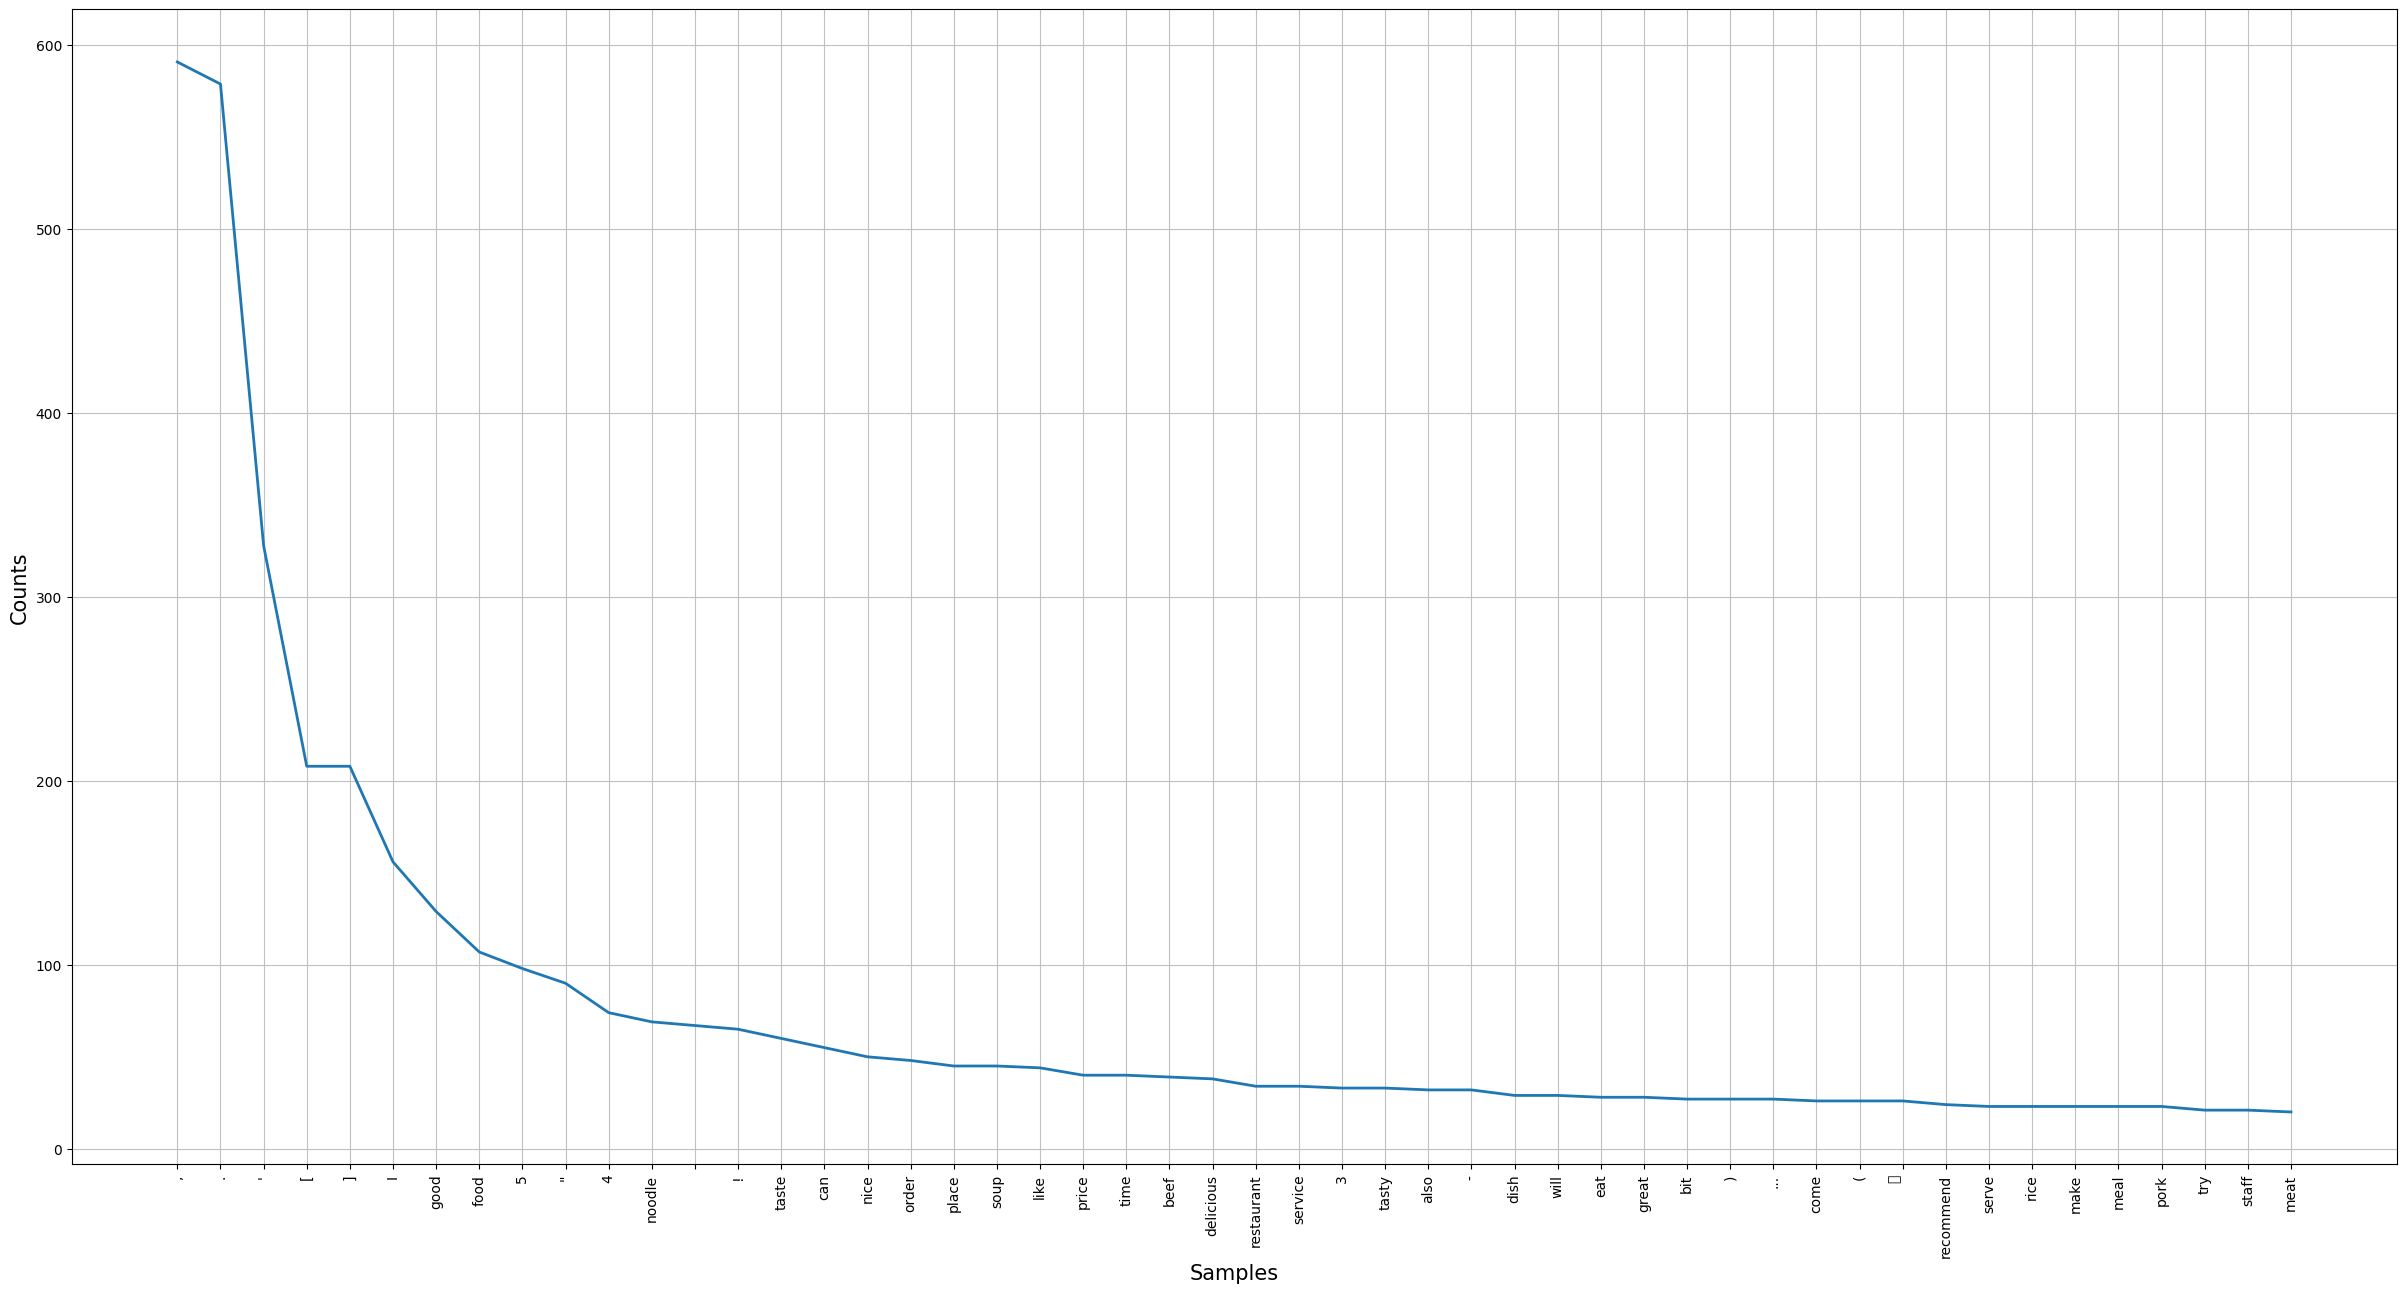

<Axes: xlabel='Samples', ylabel='Counts'>

In [76]:
plt.rcParams["figure.figsize"] = (30, 15)
fdist2.plot(50, cumulative=False)

In [77]:
#add more stopwords
num = []
for i in range(10):
    num+=str(i)
additional_stopwords = [".",",","'","[","]","(",")","..."," ","\"","!", "-"]+num

for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [word for word in val if not word[0] in additional_stopwords and word[0].isalpha()]

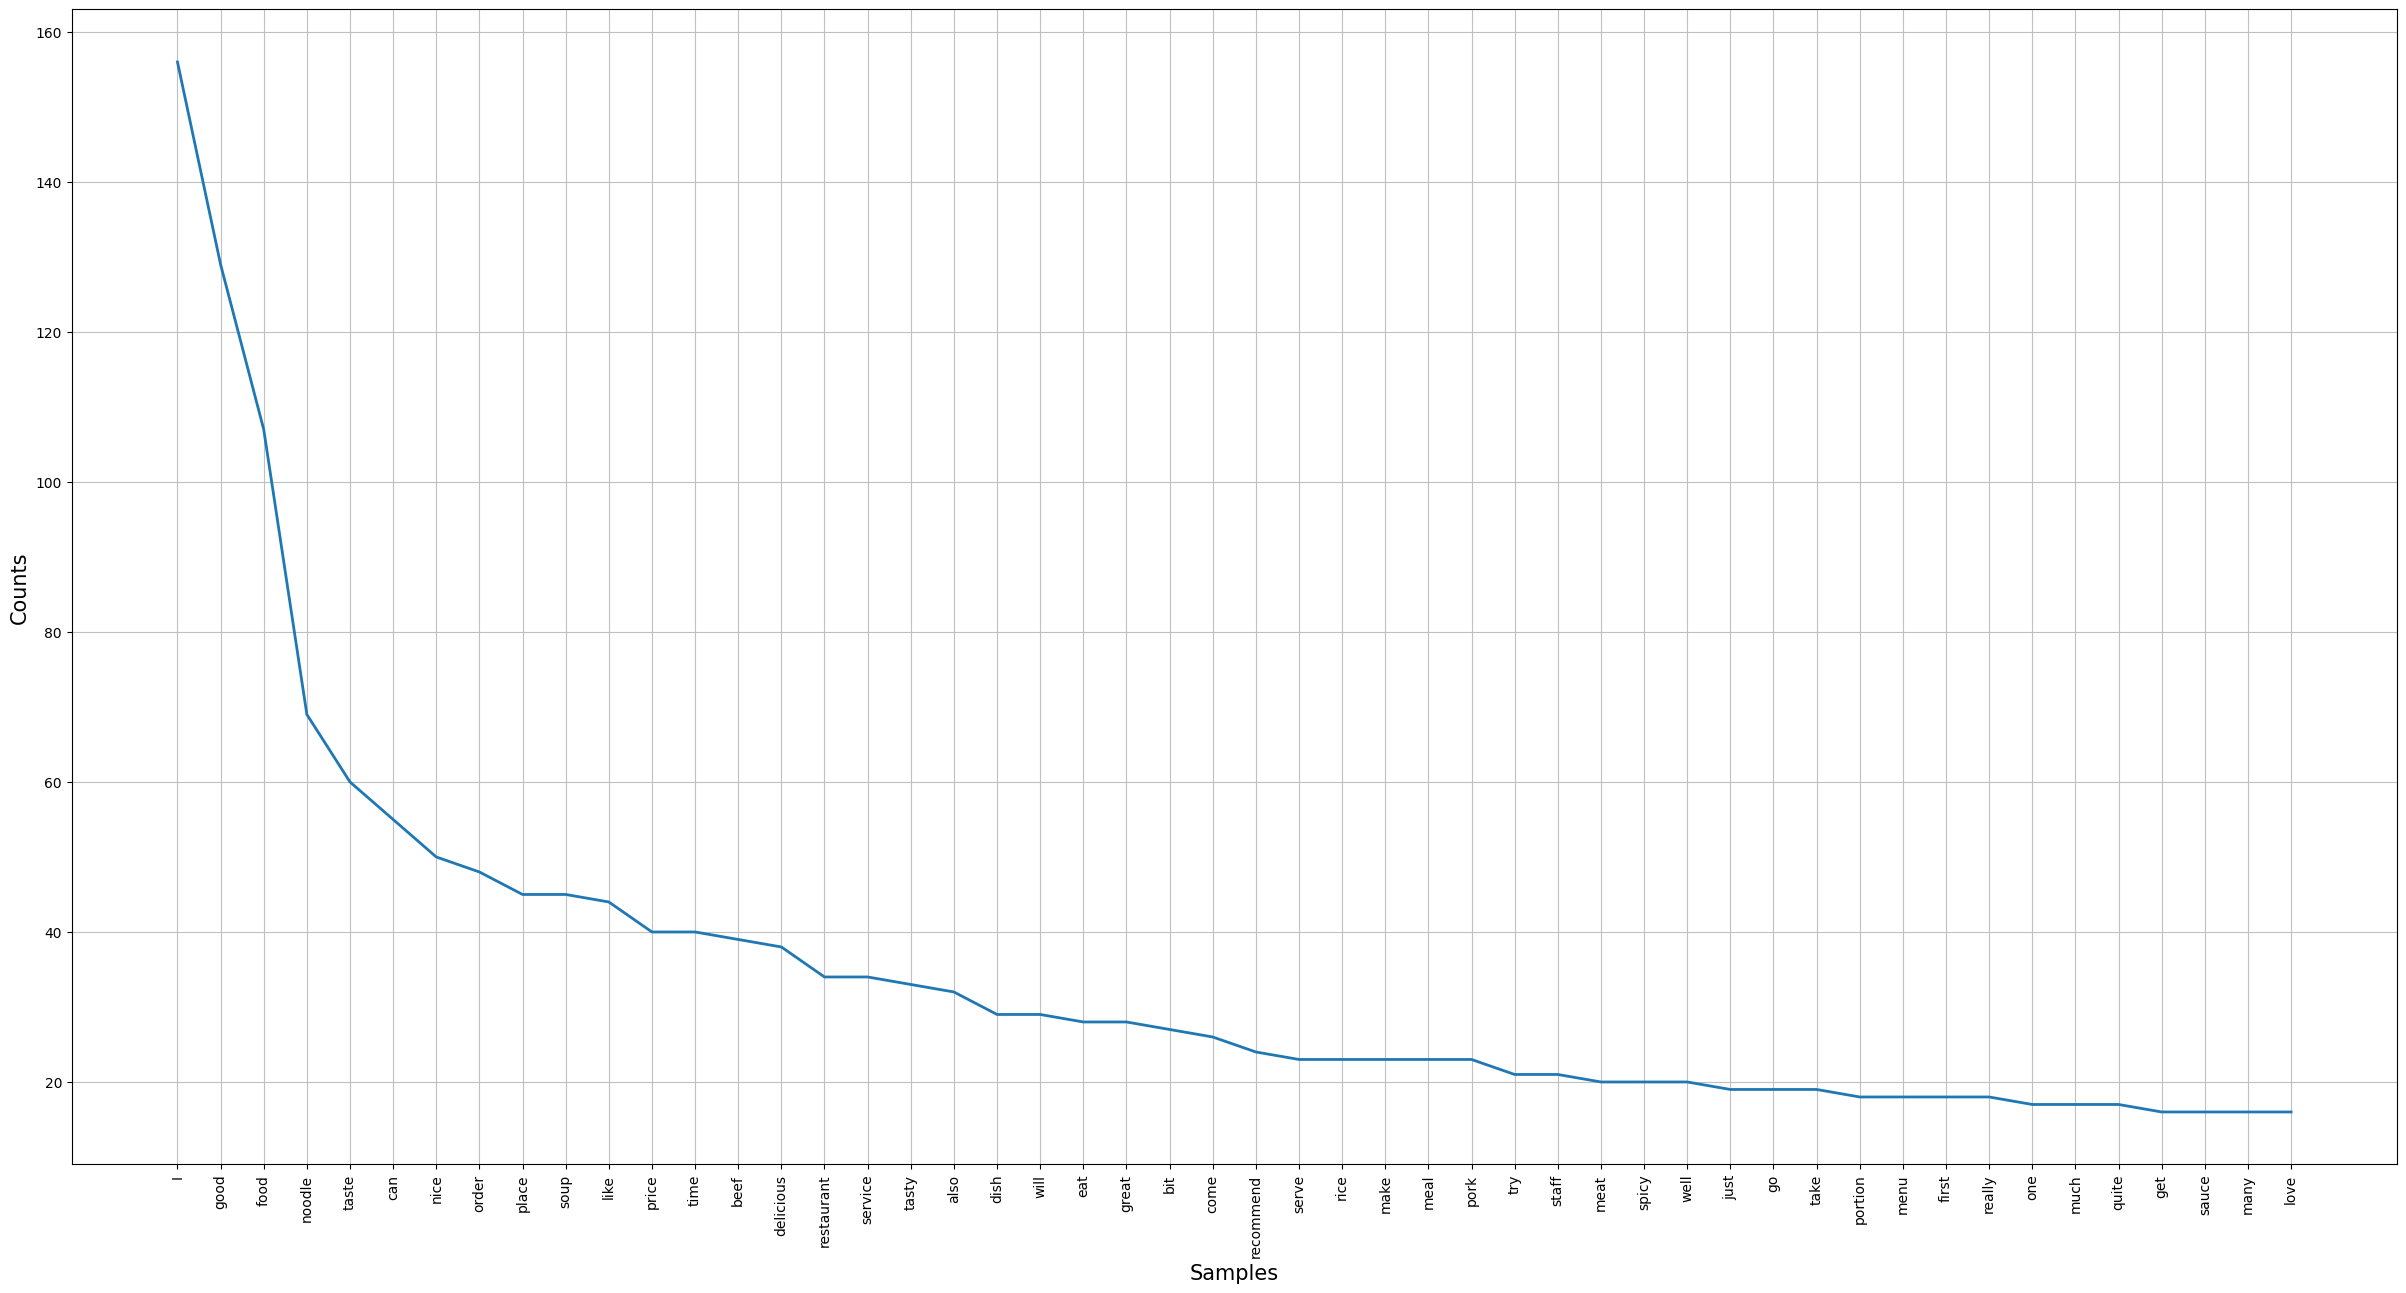

<Axes: xlabel='Samples', ylabel='Counts'>

In [78]:
poll_doc2 = []
for val in all_doc.values():
    poll_doc2+=[word[0] for word in val]

fdist = FreqDist(poll_doc2)
fdist.plot(50, cumulative=False)

In [79]:
#select Nouns/Adjectives with POS tagging
#meanwhile prepare data(data_tfidf) for tf-idf
data_tfidf = []
for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [bi for bi in val if bi[1]=="ADJ"]+[bi for bi in val if bi[1]=="PROPN"]+[bi for bi in val if bi[1]=="NOUN"]
    data_value = [bi[0] for bi in val if bi[1]=="ADJ"]+[bi[0] for bi in val if bi[1]=="PROPN"]+[bi[0] for bi in val if bi[1]=="NOUN"]
    data_value = ' '.join(data_value)
    data_tfidf.append(data_value)

In [80]:
#tf-idf feature matrix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=0.1, max_df=0.8, max_features= None)

In [81]:
feature_matrix = vectorizer.fit_transform(data_tfidf).astype(float)
feature_names = vectorizer.get_feature_names_out()
feature_df = pd.DataFrame(feature_matrix.toarray(),columns=[feature_names])
feature_df

,affordable,available,average,bad,beef,big,bit,bowl,bread,cheap,...,sweet,taiwan,taste,tasty,tea,time,value,vegetable,worth,yummy
0,0.000000,0.000000,0.454922,0.000000,0.000000,0.000000,0.160728,0.000000,0.000000,0.180903,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.599172,0.000000,0.284443,0.000000,0.000000,0.000000,...,0.082701,0.000000,0.163521,0.119273,0.000000,0.000000,0.000000,0.000000,0.000000,0.100636
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.205252,0.164426,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.289984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.337292,0.000000,0.000000,0.000000,0.219263,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.135104,0.000000,0.290030,0.000000,0.000000,0.116170,0.301485,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.097425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.172520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.186950,0.105935,0.000000,0.000000,0.121530,0.186950,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098532,0.000000,0.000000,0.110900,...,0.114591,0.000000,0.075525,0.000000,0.221800,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.187399,0.205034,0.000000,0.214988,0.000000,0.000000,0.317242,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.450449,0.000000,0.148443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.087458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.162664,0.000000,0.454831,0.000000,0.077824,0.000000,0.000000


In [82]:
#keep only the adjectives
adjs = []

for val in all_doc.values():
    for v in val:
        if v[1] == 'ADJ':
            adjs.append(v[0])

#convert to one string of text
adj_text = ' '.join(str(word) for word in adjs)

#keep only the nouns
nouns = []

for val in all_doc.values():
    for v in val:
        if v[1] == 'NOUN':
            nouns.append(v[0])

#convert to one string of text
noun_text = ' '.join(str(word) for word in nouns)

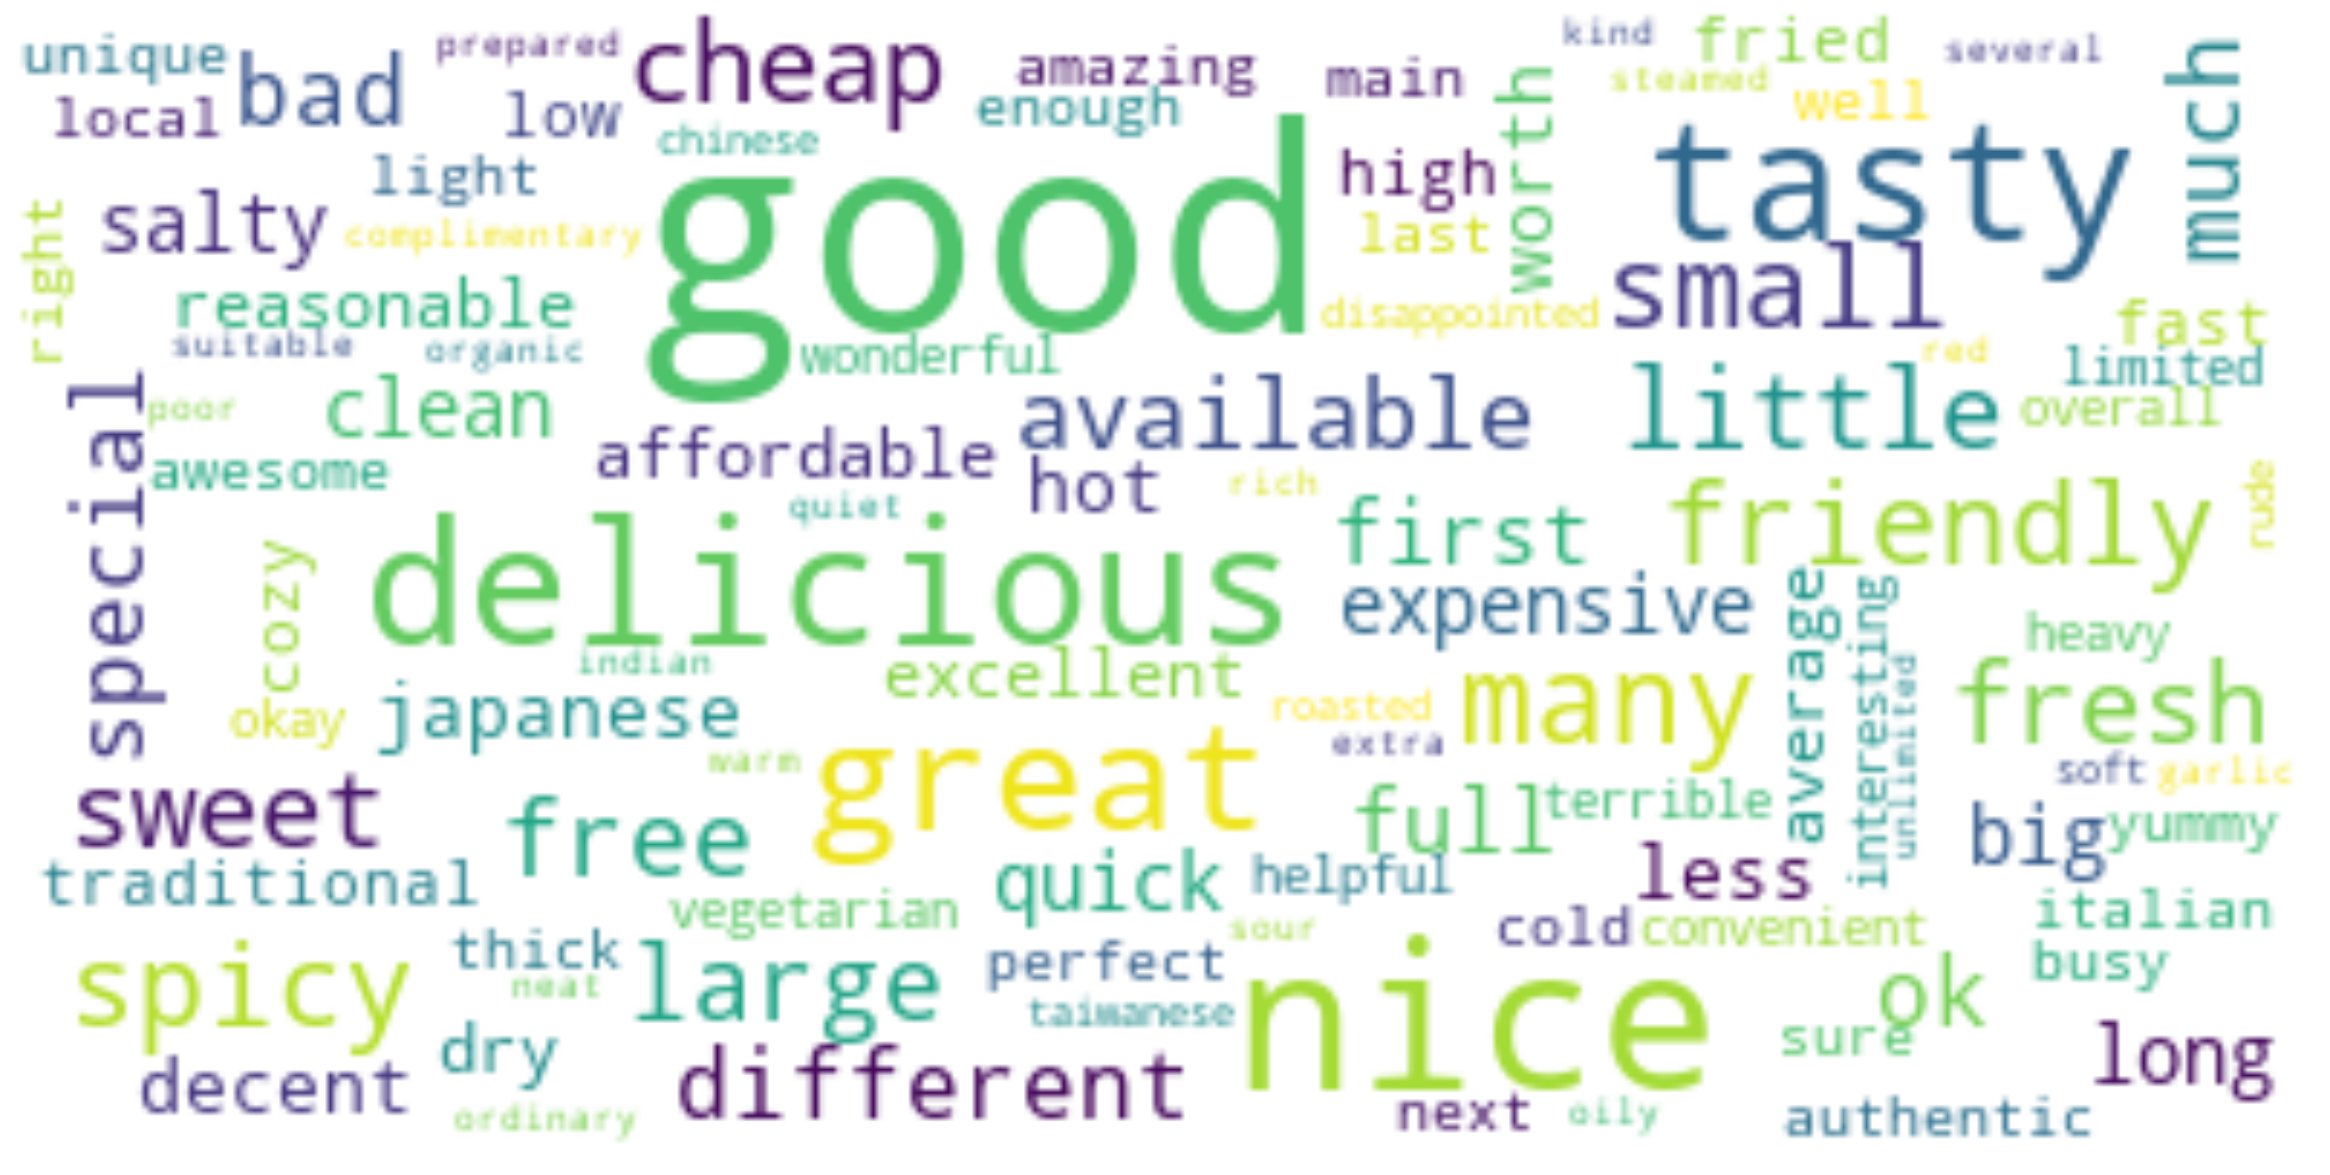

In [83]:
#!pip3 install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Generate image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(adj_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

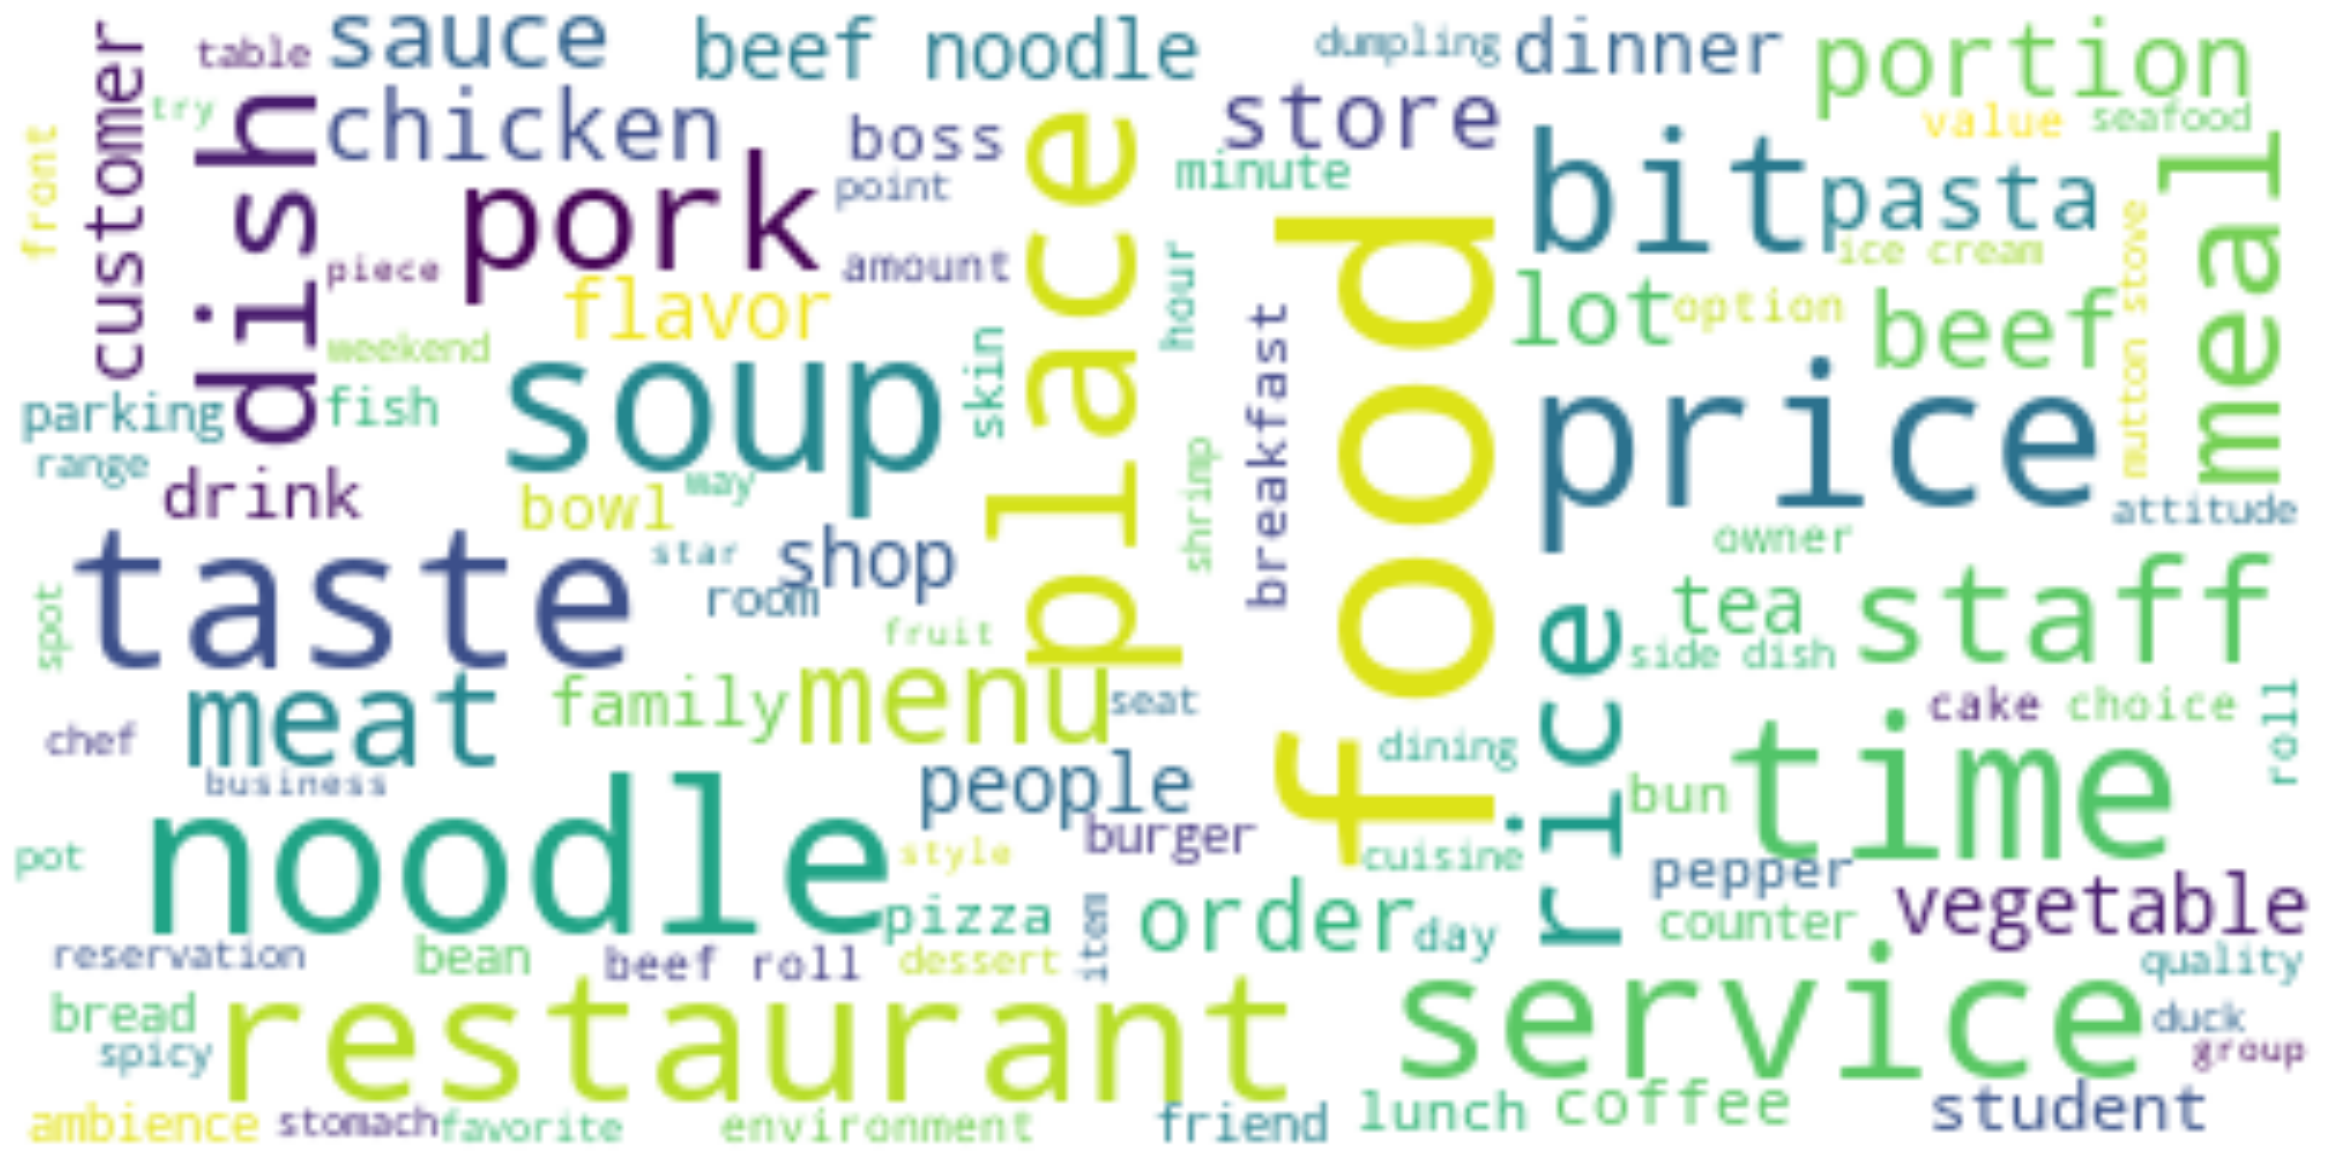

In [84]:
#Generate image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(noun_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()